# Týden 3. Vizualizace dat pomocí Pandas a Matplotlib

V minulém semestru jsme se seznámili s knihovnou Matplotlib. Ta skvěle funguje i s pandas.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Importujme náš DataFrame z minulého cvičení:

In [3]:
df = pd.read_csv('realtor-data.csv')

Některé jednoduché grafy lze vytvořit přímo pomocí pandas (pod kapotou stále používá matplolib). Nejprve si spočítejme průměrnou cenu domu v jednotlivých státech.

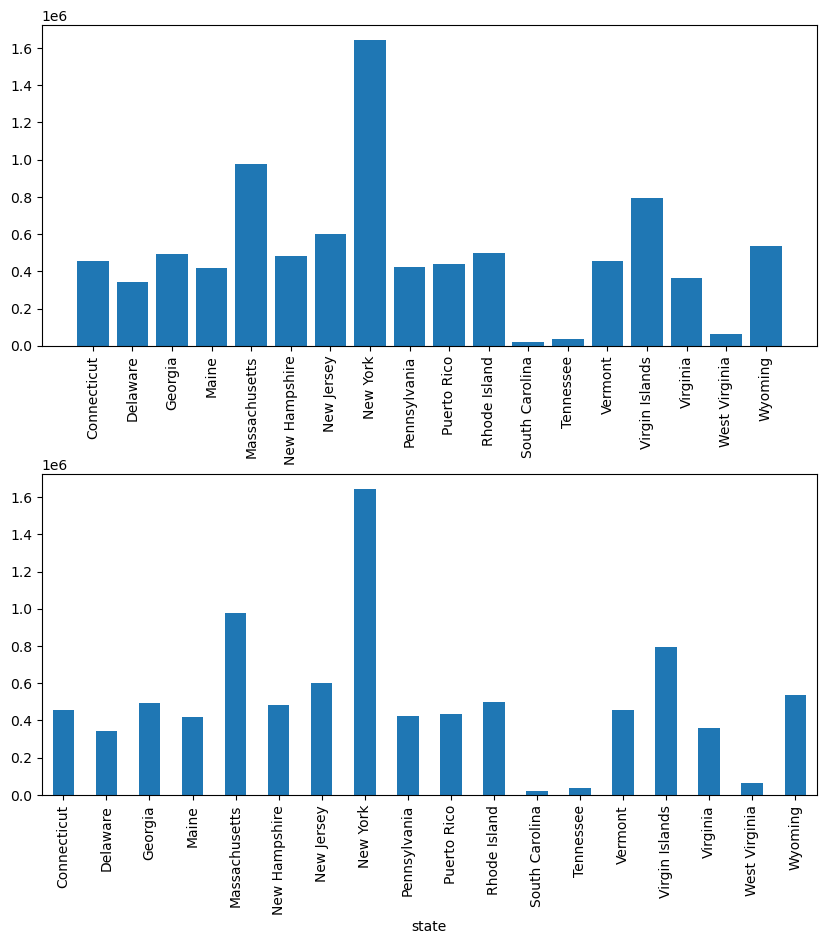

In [29]:
avg_price_by_state = df.groupby('state')['price'].mean()

f, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# matplotlib
ax1.bar(avg_price_by_state.index, avg_price_by_state.values)
ax1.set_xticks(avg_price_by_state.index)
ax1.set_xticklabels(avg_price_by_state.index, rotation=90)

# pandas
avg_price_by_state.plot(kind='bar', ax=ax2)

plt.subplots_adjust(hspace=0.4)

`.plot()` je obal pro `pyplot.plot()` a výsledkem je graf skoro identický s tím, který jste vytvořili pomocí Matplotlib. K vytvoření stejného grafu ze sloupců objektu DataFrame můžete použít jak `pyplot.plot()`, tak `df.plot()`. Pokud však již máte instanci DataFrame, pak `df.plot()` nabízí jednodušší syntaxi než `pyplot.plot()`.

`.plot()` má několik nepovinných parametrů. Zejména parametr `kind` přijímá jedenáct různých řetězcových hodnot a určuje, jaký druh grafu vytvoříte:

- `area` je určen pro plošné grafy.
- `bar` je určen pro svislé sloupcové grafy.
- `barh` je pro vodorovné sloupcové grafy.
- `box` je určen pro krabicové grafy.
- `hexbin` je pro šestiúhelníkové grafy.
- `hist` je pro histogramy.
- `kde` je pro grafy odhadu hustoty jádra.
- `density` je alternativa pro `kde`.
- `line` je pro čárové grafy.
- `pie` je pro koláčové grafy.
- `scatter` je pro grafy rozptylu.

Výchozí hodnota je `line`.

## Cvičení 1.
Vypočítejte průměrnou cenu prodaných domů v jednotlivých letech a vykreslete data (x = rok, y = průměrná cena).

### Řešení

Text(0, 0.5, 'Průměrná cena')

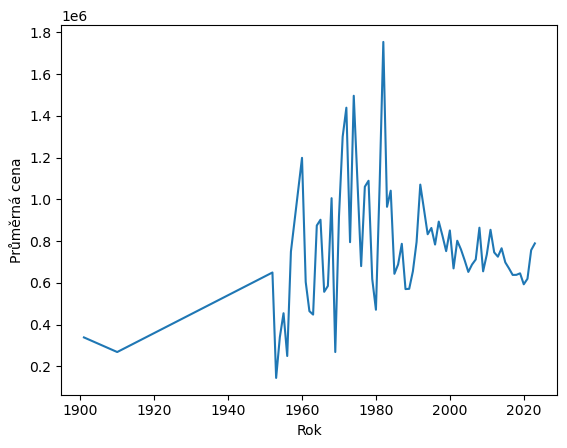

In [37]:
df['sold_date'] = pd.to_datetime(df['sold_date'])
df['Year'] = df['sold_date'].dt.year
avg_price_by_year = df.groupby('Year')['price'].mean()
avg_price_by_year.plot()
plt.xlabel('Rok')
plt.ylabel('Průměrná cena')

## Cvičení 2.
Tentokrat spočitejte průměrnou cenu za čtvereční stopu.

### Řešení

Text(0, 0.5, 'Průměrná cena za čtverečnou stopu')

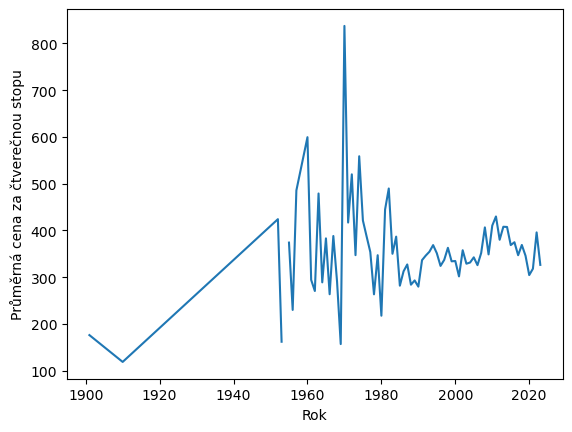

In [39]:
df['price_per_sq_ft'] = df['price'] / df['house_size']
avg_sqft_price_by_year = df.groupby('Year')['price_per_sq_ft'].mean()
avg_sqft_price_by_year.plot()
plt.xlabel('Rok')
plt.ylabel('Průměrná cena za čtverečnou stopu')

## Rozdělení a histogramy
DataFrame není jediná třída v pandas s metodou `.plot()`. Podobnou funkci poskytuje i objekt Series.

Každý sloupec DataFrame můžete získat jako objekt Series. Podíváme se na rozložení cen v roce 1981 (rok s nejvyšší průměrnou cenou).

Text(0, 0.5, 'Cena prodaných nemovitostí v roce 1970')

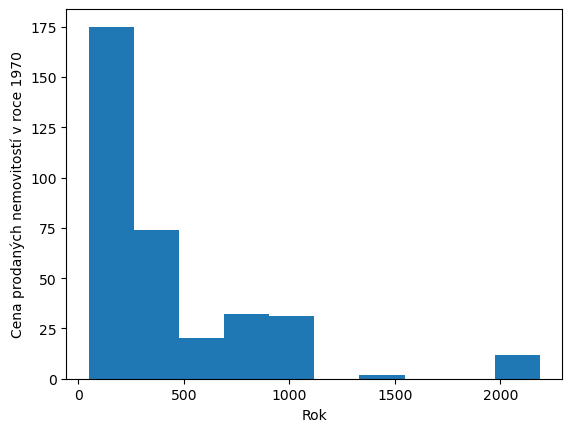

In [65]:
df[df['Year']==1981]['price_per_sq_ft'].plot(kind="hist")
plt.xlabel('Rok')
plt.ylabel('Cena prodaných nemovitostí v roce 1970')

Všimli jste si osamělého malého koše na pravém okraji distribuce? Vypádá, že průměr ceny nemovitostí v tomto roce ovlivnily několík málo velmí drahých domů. I když to není jeho hlavní účel, histogram vám může pomoci takový odlehlý bod odhalit. 

Pokud chceme porovnat, jak se vyvijela cena nemovítosti v jednotlivých statech, můžeme třeba zase použít barplot:

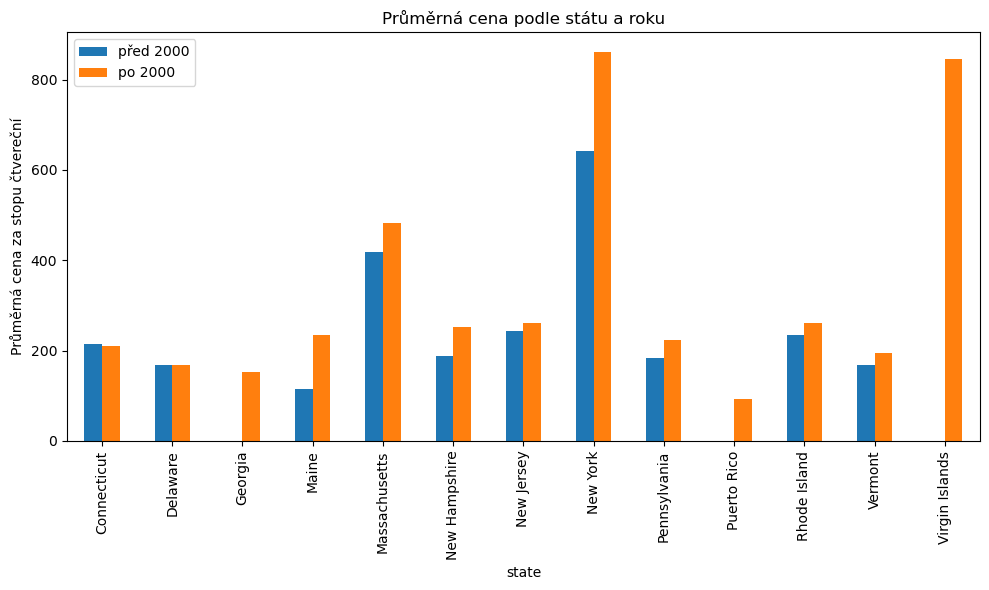

In [68]:
avg_price_by_state_20 = df[df['Year']<2000].groupby('state')['price_per_sq_ft'].mean()
avg_price_by_state_21 = df[df['Year']>=2000].groupby('state')['price_per_sq_ft'].mean()

df_avg_prices = pd.DataFrame({
    'před 2000': avg_price_by_state_20,
    'po 2000': avg_price_by_state_21
})

# Plotting
ax = df_avg_prices.plot(kind='bar', figsize=(10, 6), rot=90)

ax.set_ylabel('Průměrná cena za stopu čtvereční')
ax.set_title('Průměrná cena podle státu a roku')
plt.tight_layout()
plt.show()

## Kontrola korelace
Často chcete zjistit, zda jsou dva sloupce datové sady propojené. Třeba jak počet ložnic ovlivňuje cenu?

<Axes: xlabel='bed', ylabel='price_per_sq_ft'>

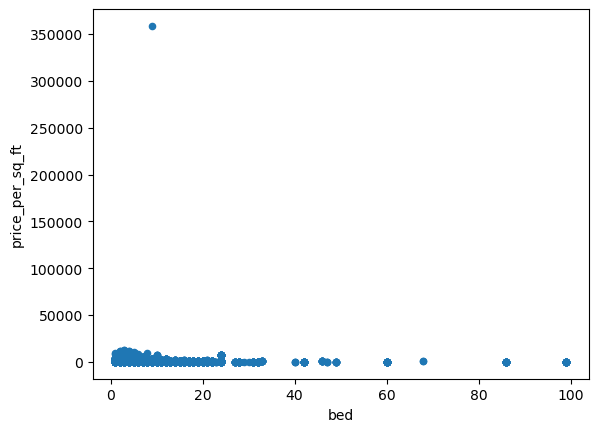

In [72]:
df.plot(x="bed", y="price_per_sq_ft", kind="scatter")

Kvůli outlierům není to moc vidět. Můžeme ale zazoomovat na zajmovou oblast:

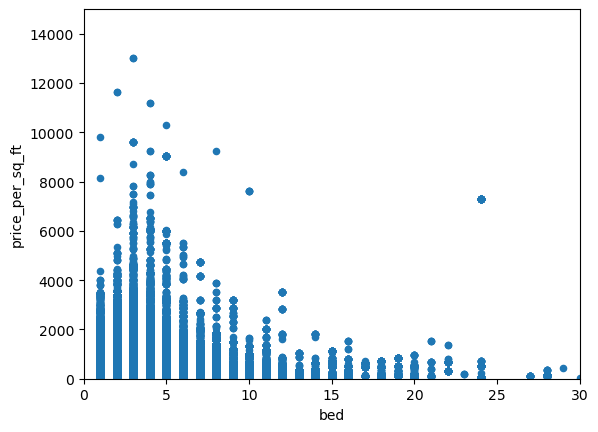

In [77]:
ax = df.plot(x="bed", y="price_per_sq_ft", kind="scatter")
ax.set_xlim(0, 30)     # Chceme videt maximalne 30 ložnic
ax.set_ylim(0, 15000)  # Chceme videt cenu do maximalne 15 tisic
plt.show()

Vypadá, že domy s více jak 10 ložnicemi mají nizší ceny za plochu. Odhadli byste proč?

I když je graf rozptylu vynikajícím nástrojem pro získání prvního dojmu o možné korelaci, rozhodně není definitivním důkazem souvislosti. Pro přehled korelací mezi různými sloupci můžete použít funkci .corr(). Pokud máte podezření na korelaci mezi dvěma hodnotami, pak máte k dispozici několik nástrojů, kterými si můžete ověřit své tušení a změřit, jak silná korelace je.

Mějte však na paměti, že i když mezi dvěma hodnotami existuje korelace, ještě to neznamená, že změna jedné z nich povede ke změně druhé. Jinými slovy, korelace neznamená příčinnou souvislost.

## Analýza kategoriálních dat
Už jsme použili metodu `groupby()`k seskupení dat podle kategorií, jako stat a rok prodeje. Můžeme se podívat na 20 nejdrazších měst a vykreslit horizontalní barplot:

<Axes: ylabel='city'>

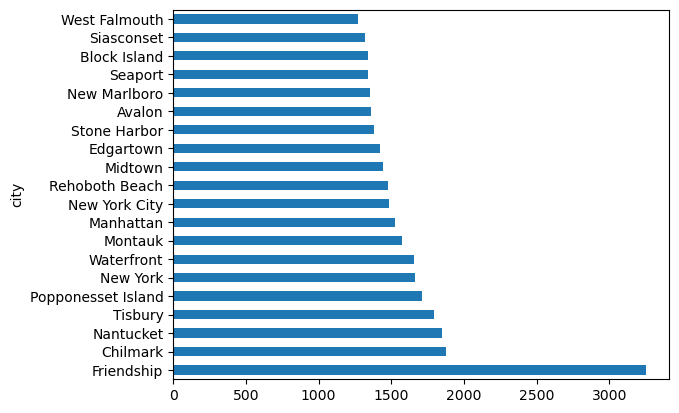

In [89]:
df.groupby('city')['price_per_sq_ft'].mean().sort_values(ascending=False).iloc[:20].plot(kind="barh")

## Stanovení poměrů
Svislé a vodorovné sloupcové grafy jsou často dobrou volbou, pokud chcete vidět rozdíly mezi kategoriemi. Pokud vás zajímají poměry, pak jsou vynikajícím nástrojem koláčové grafy.

In [99]:
bath_totals = df.groupby("bath").size()[:10]
bath_totals

bath
1.0     135014
2.0     228528
3.0     157069
4.0      56251
5.0      21328
6.0      10555
7.0       4704
8.0       3107
9.0       1805
10.0      1048
dtype: int64

Text(0.5, 1.0, 'Podíl nemovitostí podle počtu koupelen')

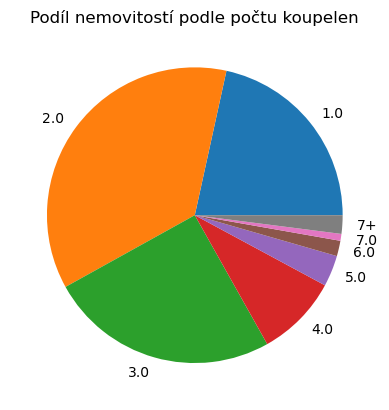

In [104]:
bath_totals = df.groupby("bath").size()

bath_totals_1 = bath_totals[:7]
bath_totals_2 = bath_totals[7:]

# Dodame novou polozku "10+" se sumou ostatních kategorii
bath_totals_2 = pd.Series([bath_totals_2.sum()], index=["7+"])
bath_totals_1 = pd.concat([bath_totals_1, bath_totals_2])
bath_totals_1.plot(kind="pie", label="")

plt.title('Podíl nemovitostí podle počtu koupelen')